In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math


In [3]:
td=pd.read_csv('naren1.csv')
td.head(10)

,Survived,Pclass,Name,Gender,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [4]:
print('No. of passenger',len(td))

No. of passenger 887


# Analyzing Data

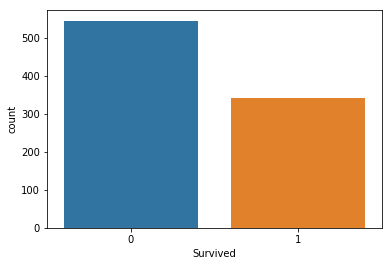

In [5]:
sns.countplot(x='Survived',data=td)

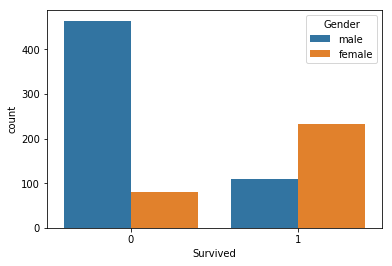

In [7]:
sns.countplot(x='Survived',hue='Gender',data=td)

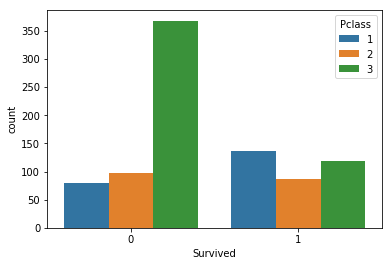

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=td)

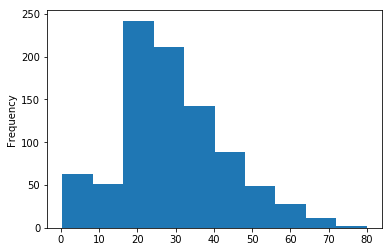

In [9]:
td["Age"].plot.hist()

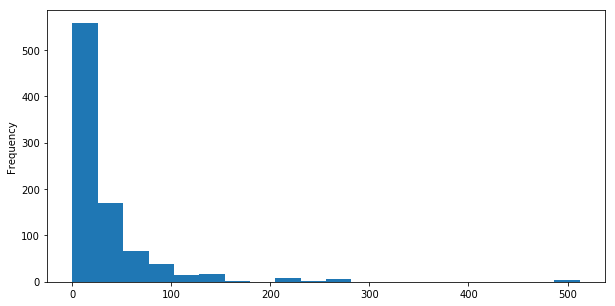

In [10]:
td['Fare'].plot.hist(bins=20,figsize=(10,5))

In [11]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Gender                     887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 48.5+ KB


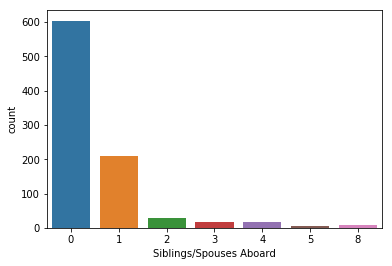

In [12]:
sns.countplot(x='Siblings/Spouses Aboard',data=td)

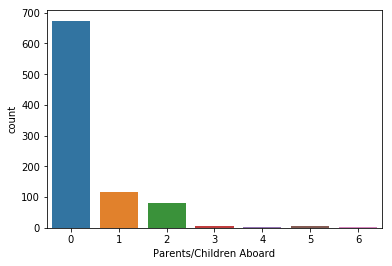

In [13]:
sns.countplot(x='Parents/Children Aboard',data=td)

In [14]:
td.isnull().sum() # to find the sum of null values

Survived                   0
Pclass                     0
Name                       0
Gender                     0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

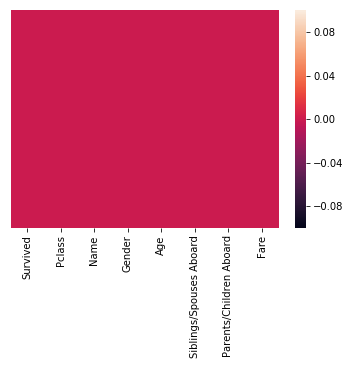

In [15]:
sns.heatmap(td.isnull(),yticklabels=False) #used to find missing values

In [330]:
#td.drop('column name',axis='columns',inplace=True) to drop any columns

In [331]:
#td.dropna(inplace=True) to drop nan values

In [16]:
td.head(2)

,Survived,Pclass,Name,Gender,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833


In [18]:
sex=pd.get_dummies(td['Gender'],drop_first=True) 
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [19]:
pcl=pd.get_dummies(td['Pclass'],drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [20]:
td=pd.concat([td,sex,pcl],axis='columns')
td.head(5)

,Survived,Pclass,Name,Gender,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,0,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,0,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,0,1


In [21]:
td.drop(['Pclass','Gender','Name'],axis='columns',inplace=True)
td.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


# Train Data

In [22]:
X=td.drop('Survived',axis="columns")
y=td['Survived']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)

In [25]:
from sklearn.linear_model import LogisticRegression

In [28]:
model=LogisticRegression()

In [29]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
predictions=model.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.79      0.80      0.79       162\n           1       0.68      0.68      0.68       105\n\n   micro avg       0.75      0.75      0.75       267\n   macro avg       0.74      0.74      0.74       267\nweighted avg       0.75      0.75      0.75       267\n'

In [33]:
  from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test,predictions)

array([[129,  33],
       [ 34,  71]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,predictions)

0.7490636704119851